# Charity Client Analysis

This is a notebook analysing information about responses to charity broadcast emails

### Summary:
Of the supporters who recieve these emails, 99% open them, 9.7% click on a link in the email, and 0.7% unsub. <br>
Some individual supporters are looked at here - it does appear that these broadcast emails are triggering donations the same day. <br>
Of everyone who recieved a broadcasting email, 1.12% made a donation the same day. <br>
The top broadcast emails in terms of money donated and no. donators are considered below, an especially good performer is ID 158313, after which 10.5% of supporters who recieved the email donated


# Taking a look at the data:

Starting off by reading in the data:

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
sends = pd.read_csv('sends.csv')#broadcast data
sends

,CAMPAIGNER_ID,BROADCAST_ID
0,qMPJbluhCXQ=,158828
1,BDoflNnPHog=,154395
2,BDoflNnPHog=,157751
3,BDoflNnPHog=,158310
4,BDoflNnPHog=,158828
...,...,...
9302064,rBY7g0JQaemha0eWUOvjsw==,159888
9302065,285BMdvgOHm%2FgO2vkuoghg==,154395
9302066,U6DSvSg5blaha0eWUOvjsw==,154395
9302067,MJXwRaLlbYe15xl1A%2FXc2A==,159229


Let's look at each month of the transactional data

In [3]:
march = pd.read_csv('march.csv')
march.head(10)

/Users/eleonoraparrag/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3457: DtypeWarning: Columns (9,10,11,12,14,15) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,SUPPORTER_ID,COUNTRY,ACTIVITY_TYPE,ACTIVITY_DATETIME,ACTIVITY_ID,ACTIVITY_STATUS,ACTIVITY_DATA_1,ACTIVITY_DATA_2,ACTIVITY_DATA_3,ACTIVITY_DATA_4,...,ACTIVITY_DATA_6,ACTIVITY_DATA_7,ACTIVITY_DATA_8,ACTIVITY_DATA_9,ACTIVITY_DATA_10,ACTIVITY_DATA_26,ACTIVITY_DATA_27,ACTIVITY_DATA_28,ACTIVITY_DATA_29,ACTIVITY_DATA_30
0,BDoflNnPHog=,CA,ETT,2017-03-07 09:36:52,63955,P,Warnel May,Escobar,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,kudFmD%2ByF7w=,CAN,ETT,2017-03-06 15:05:34,63955,P,Warnel May,Escobar,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,r58OmfDBRm8=,CA,PET,2017-03-02 22:46:26,37410,P,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,ALJUUgR5fOs=,CAN,ETT,2017-03-20 16:15:17,66158,P,Christy,Clark,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,nEgT0q6l4MY=,CAN,ETT,2017-03-06 19:15:09,63955,P,Warnel May,Escobar,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,nEgT0q6l4MY=,CAN,ETT,2017-03-22 20:52:45,66158,P,Christy,Clark,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,iCMWgRPRfuQ=,CAN,ETT,2017-03-20 13:05:53,66158,P,Christy,Clark,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,aBaULoRsiY4=,CA,ETT,2017-03-15 19:05:02,39763,P,Claude,Carignan,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,MpbERpuNCk0=,CA,ETT,2017-03-06 15:03:42,63955,P,Warnel May,Escobar,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,MpbERpuNCk0=,CA,ETT,2017-03-21 08:51:53,66158,P,Christy,Clark,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
april = pd.read_csv('april.csv')
april.head(10)

/Users/eleonoraparrag/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3457: DtypeWarning: Columns (9,10,11,12,14,15) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,SUPPORTER_ID,COUNTRY,ACTIVITY_TYPE,ACTIVITY_DATETIME,ACTIVITY_ID,ACTIVITY_STATUS,ACTIVITY_DATA_1,ACTIVITY_DATA_2,ACTIVITY_DATA_3,ACTIVITY_DATA_4,...,ACTIVITY_DATA_6,ACTIVITY_DATA_7,ACTIVITY_DATA_8,ACTIVITY_DATA_9,ACTIVITY_DATA_10,ACTIVITY_DATA_26,ACTIVITY_DATA_27,ACTIVITY_DATA_28,ACTIVITY_DATA_29,ACTIVITY_DATA_30
0,nY8jgGWxUeA=,CA,ETT,2017-04-04 17:02:58,66281,P,Justin,Trudeau,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,nY8jgGWxUeA=,CA,ETT,2017-04-03 16:20:54,67130,P,Dummy,Target,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,5Aia2InAifo=,GBR,ETT,2017-04-06 07:56:55,66281,P,Justin,Trudeau,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,kudFmD%2ByF7w=,CAN,ETT,2017-04-04 08:17:15,66281,P,Justin,Trudeau,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,nEgT0q6l4MY=,CAN,ETT,2017-04-04 15:34:07,66281,P,Justin,Trudeau,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,nEgT0q6l4MY=,CAN,ETT,2017-04-01 23:33:57,67130,P,Dummy,Target,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,MpbERpuNCk0=,CA,ETT,2017-04-04 08:34:04,66281,P,Justin,Trudeau,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,MpbERpuNCk0=,CA,ETT,2017-04-04 08:31:44,67130,P,Dummy,Target,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,yWg1o0ksoTw=,CA,ETT,2017-04-04 12:23:14,66281,P,Justin,Trudeau,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,u8zF6BZ07dA=,CAN,ETT,2017-04-01 09:20:41,67130,P,Dummy,Target,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
may = pd.read_csv('may.csv')
may.head(10)

/Users/eleonoraparrag/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3457: DtypeWarning: Columns (9,10,11,12,14,15) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,SUPPORTER_ID,COUNTRY,ACTIVITY_TYPE,ACTIVITY_DATETIME,ACTIVITY_ID,ACTIVITY_STATUS,ACTIVITY_DATA_1,ACTIVITY_DATA_2,ACTIVITY_DATA_3,ACTIVITY_DATA_4,...,ACTIVITY_DATA_6,ACTIVITY_DATA_7,ACTIVITY_DATA_8,ACTIVITY_DATA_9,ACTIVITY_DATA_10,ACTIVITY_DATA_26,ACTIVITY_DATA_27,ACTIVITY_DATA_28,ACTIVITY_DATA_29,ACTIVITY_DATA_30
0,nY8jgGWxUeA=,CA,ETT,2017-05-16 14:51:20,69202,P,Jacques,Chagnon,Westmount-Saint-Louis,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,xGowEj2GsF0=,CA,ETT,2017-05-31 11:59:48,69589,P,Dummy,Target,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,MpbERpuNCk0=,CA,ETT,2017-05-31 08:23:51,69589,P,Dummy,Target,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,yWg1o0ksoTw=,CA,PET,2017-05-02 08:50:26,37410,P,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,u8zF6BZ07dA=,CAN,ETT,2017-05-12 10:46:56,69202,P,Hélène,David,Outremont,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,Hv84MRhymTw=,CAN,ETT,2017-05-31 10:43:08,69589,P,Dummy,Target,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,75UmJ%2FStw%2Fg=,CAN,ETT,2017-05-31 11:34:27,69589,P,Dummy,Target,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,1ad8rX62IIM=,CA,ETT,2017-05-31 11:38:03,69589,P,Dummy,Target,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,O55DPPMMY5Y=,CAN,ETT,2017-05-31 21:16:07,69589,P,Dummy,Target,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,JpNdRwPRplI=,CA,ETT,2017-05-14 05:44:31,69202,P,David,Birnbaum,D'Arcy-McGee,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


How many unique broadcasts do we have?

In [6]:
broadcasts = pd.unique(sends['BROADCAST_ID'])
broadcasts

array([158828, 154395, 157751, 158310, 159229, 159888, 161768, 162036,
       157563, 157848, 158976, 160147, 161151, 161951, 160150, 161583,
       158311, 162032, 159331, 161032, 161655, 159077, 161584, 162037,
       158308, 159329, 161581, 158309, 159328, 160975, 162035, 158313,
       159079, 160604, 159076, 161582, 159222, 158822, 160558, 159219,
       157243, 160353, 158477])

In [7]:
print(len(broadcasts))

43


# Task 1: Broadcasts

Let's filter these transactional data tables for each month by only the broadcasts detailed in the sends table (so only the broadcast emails)

In [8]:
march_filtered = march[march['ACTIVITY_ID'].isin(broadcasts)]

In [9]:
april_filtered = april[april['ACTIVITY_ID'].isin(broadcasts)]

In [10]:
may_filtered = may[may['ACTIVITY_ID'].isin(broadcasts)]

How many broadcast emails were sent each month?

In [11]:
print('MARCH had '+str(len(pd.unique(march_filtered['ACTIVITY_ID'])))+' unique broadcast emails to '+str(len(march_filtered))+ ' supporters')
print('APRIL had '+str(len(pd.unique(april_filtered['ACTIVITY_ID'])))+' unique broadcast emails to '+str(len(april_filtered))+ ' supporters')
print('MAY had '+str(len(pd.unique(may_filtered['ACTIVITY_ID'])))+' unique broadcast emails to '+str(len(may_filtered))+ ' supporters')


MARCH had 43 unique broadcast emails to 1435793 supporters
APRIL had 42 unique broadcast emails to 56360 supporters
MAY had 42 unique broadcast emails to 11203 supporters


Note to self: <br>
DATA7: marks as spam <br>
DATA6: unsub <br>
DATA5: soft bounce <br>
DATA4: hard bounce <br>
DATA3: form submit <br>
DATA2: click link <br>
DATA1: open email <br>

In [12]:
march[march['ACTIVITY_ID']==158828] #let's look at one example

,SUPPORTER_ID,COUNTRY,ACTIVITY_TYPE,ACTIVITY_DATETIME,ACTIVITY_ID,ACTIVITY_STATUS,ACTIVITY_DATA_1,ACTIVITY_DATA_2,ACTIVITY_DATA_3,ACTIVITY_DATA_4,...,ACTIVITY_DATA_6,ACTIVITY_DATA_7,ACTIVITY_DATA_8,ACTIVITY_DATA_9,ACTIVITY_DATA_10,ACTIVITY_DATA_26,ACTIVITY_DATA_27,ACTIVITY_DATA_28,ACTIVITY_DATA_29,ACTIVITY_DATA_30
315534,BDoflNnPHog=,CA,EBC,2017-03-13 13:16:19,158828,R,open,NaN,NaN,NaN,...,NaN,NaN,NaN,135857,NaN,NaN,NaN,NaN,NaN,NaN
315538,5Aia2InAifo=,GBR,EBC,2017-03-13 12:19:06,158828,R,open,NaN,NaN,NaN,...,NaN,NaN,NaN,135857,NaN,NaN,NaN,NaN,NaN,NaN
315545,kudFmD%2ByF7w=,CAN,EBC,2017-03-13 12:37:17,158828,R,open,click,NaN,NaN,...,NaN,NaN,NaN,135857,NaN,NaN,NaN,NaN,NaN,NaN
315553,ZV12djKQb3E=,CA,EBC,2017-03-17 02:07:04,158828,R,open,NaN,NaN,NaN,...,NaN,NaN,NaN,135857,NaN,NaN,NaN,NaN,NaN,NaN
315565,nEgT0q6l4MY=,CAN,EBC,2017-03-13 12:49:17,158828,R,open,click,NaN,NaN,...,NaN,NaN,NaN,135857,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1813361,l4106AJrrnOha0eWUOvjsw==,JP,EBC,2017-03-13 12:19:14,158828,R,open,click,NaN,NaN,...,NaN,NaN,NaN,135857,NaN,NaN,NaN,NaN,NaN,NaN
1813379,D4HkyetrcBcqJI2ZMf1z3w==,CAN,EBC,2017-03-14 12:52:16,158828,R,open,NaN,NaN,NaN,...,NaN,NaN,NaN,135857,NaN,NaN,NaN,NaN,NaN,NaN
1813584,6c0ckqSDaLYqJI2ZMf1z3w==,US,EBC,2017-03-13 13:34:01,158828,R,open,click,NaN,NaN,...,NaN,NaN,NaN,135857,NaN,NaN,NaN,NaN,NaN,NaN
1813609,20M9pyKc%2FANkwMmtusGc0w==,US,EBC,2017-03-13 12:30:00,158828,R,NaN,NaN,NaN,hbounce,...,NaN,NaN,NaN,135857,NaN,NaN,NaN,NaN,NaN,NaN


Form submit looks to be all empty. Hard and soft bounce suggest issues with delivering the email. I will focus on opened, clicked link, unsubbed, and reported as spam, as these seem the most interesting

In [13]:
#function to count up how many times the broadcast was opened/etc. for a given dataframe
def get_stats(df):
    total=len(df)
    opened = df.value_counts('ACTIVITY_DATA_1')[0]
    clicked = df.value_counts('ACTIVITY_DATA_2')[0]
    unsub = df.value_counts('ACTIVITY_DATA_6')[0]
    spam = df.value_counts('ACTIVITY_DATA_7')[0]
    return(total,opened, clicked, unsub,spam)

Let's have a look at this for a sample broadcast

In [14]:
total,opened, clicked, unsub,spam = get_stats(march[march['ACTIVITY_ID']==158828]) 
print('Total',total)
print('Opened:',opened,' ',str(((opened/total)*100)),'%')
print('Clicked:',clicked,' ',str(((clicked/total)*100)),'%')
print('Unsubbed:',unsub,' ',str(((unsub/total)*100)),'%')
print('Marked as spam:',spam,' ',str(((spam/total)*100)),'%')

Total 51938
Opened: 51567   99.285686780392 %
Clicked: 5114   9.846355269744695 %
Unsubbed: 148   0.2849551388193615 %
Marked as spam: 9   0.017328353036312527 %


Make it into percentages to compare easily between difference months? (divide each by total emails)

In [15]:
total,opened, clicked, unsub,spam = get_stats(march_filtered)
stats_march = [opened/total,clicked/total,unsub/total,spam/total]
total,opened, clicked, unsub,spam = get_stats(april_filtered)
stats_april = [opened/total,clicked/total,unsub/total,spam/total]
total,opened, clicked, unsub,spam = get_stats(may_filtered)
stats_may = [opened/total,clicked/total,unsub/total,spam/total]

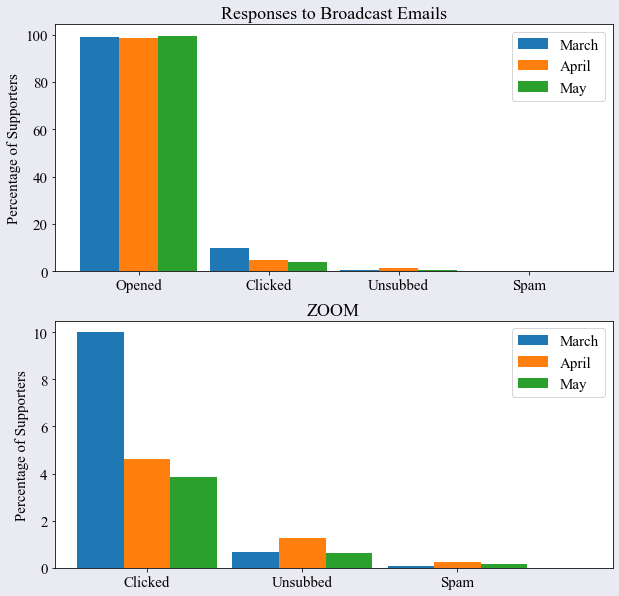

In [16]:
import matplotlib as mpl
from matplotlib.ticker import (MultipleLocator, FormatStrFormatter,
                               AutoMinorLocator)

mpl.rc('font', size=15)
mpl.rc('xtick', labelsize=15)
mpl.rc('ytick', labelsize=15)
mpl.rc('font',family='Times New Roman')

fig,ax = plt.subplots(nrows=2,ncols=1,figsize=(10,10),facecolor='#eaeaf2')
#cats = ['Opened','Clicked','Unsubbed','Spam']

plt.setp(ax[0], xticks=[1,2,3,4], xticklabels=['Opened','Clicked','Unsubbed','Spam'])
plt.sca(ax[0])
plt.xticks(range(4), ['Opened','Clicked','Unsubbed','Spam'])

X_axis = np.arange(4) 
  
ax[0].bar(X_axis - 0.3, np.array(stats_march)*100, 0.3, label = 'March') 
ax[0].bar(X_axis, np.array(stats_april)*100, 0.3, label = 'April') 
ax[0].bar(X_axis + 0.3, np.array(stats_may)*100, 0.3, label = 'May') 
 
ax[0].set_ylabel("Percentage of Supporters") 
ax[0].legend() 

#cats = ['Clicked','Unsubbed','Spam']
 
X_axis = np.arange(3) 
  
ax[1].bar(X_axis - 0.3, np.array(stats_march)[1:4]*100, 0.3, label = 'March') 
ax[1].bar(X_axis, np.array(stats_april)[1:4]*100, 0.3, label = 'April') 
ax[1].bar(X_axis + 0.3, np.array(stats_may)[1:4]*100, 0.3, label = 'May') 


plt.setp(ax[1], xticks=[1,2,3], xticklabels=['Clicked','Unsubbed','Spam'])
plt.sca(ax[1])
plt.xticks(range(3), ['Clicked','Unsubbed','Spam'])
 
ax[1].set_ylabel("Percentage of Supporters") 
ax[1].legend() 

ax[0].set_title('Responses to Broadcast Emails')
ax[1].set_title('ZOOM')
plt.show() 

The optimal response here is clicking a link in the email (maximum engagement) and the worst are unsubbing and reporting as spam. It seems that the benefits of the broadcast email are best when it is recent, as after that the percentage of people clicking on the email begins to decrease. Not much effect on whether the email is opened. If they unsub, it's most likely to be in the second month. However, the percentage unsubbing is generally very low.

What about the overall stats?

In [17]:
total,opened, clicked, unsub,spam = get_stats(pd.concat((march_filtered,april_filtered,may_filtered)))
print('Total',total)
print('Opened:',opened,' ',str(((opened/total)*100)),'%')
print('Clicked:',clicked,' ',str(((clicked/total)*100)),'%')
print('Unsubbed:',unsub,' ',str(((unsub/total)*100)),'%')
print('Marked as spam:',spam,' ',str(((spam/total)*100)),'%')

Total 1503356
Opened: 1488551   99.0152033184422 %
Clicked: 146361   9.735618176932144 %
Unsubbed: 10406   0.6921846854637226 %
Marked as spam: 1064   0.07077498609777058 %


# Task 2: Individual Supporter Information

We're just going to concatenate all three transactional tables to look at all the data together, both for all broadcast email data, and also all activity types

In [18]:
all_filtered = pd.concat((march_filtered,april_filtered,may_filtered))
all_filtered.head(10)

,SUPPORTER_ID,COUNTRY,ACTIVITY_TYPE,ACTIVITY_DATETIME,ACTIVITY_ID,ACTIVITY_STATUS,ACTIVITY_DATA_1,ACTIVITY_DATA_2,ACTIVITY_DATA_3,ACTIVITY_DATA_4,...,ACTIVITY_DATA_6,ACTIVITY_DATA_7,ACTIVITY_DATA_8,ACTIVITY_DATA_9,ACTIVITY_DATA_10,ACTIVITY_DATA_26,ACTIVITY_DATA_27,ACTIVITY_DATA_28,ACTIVITY_DATA_29,ACTIVITY_DATA_30
315531,BDoflNnPHog=,CA,EBC,2017-03-07 09:37:06,154395,R,open,click,formsub,NaN,...,NaN,NaN,NaN,131397,NaN,NaN,NaN,NaN,NaN,NaN
315532,BDoflNnPHog=,CA,EBC,2017-03-02 09:25:09,157751,R,open,NaN,NaN,NaN,...,NaN,NaN,NaN,134772,NaN,NaN,NaN,NaN,NaN,NaN
315533,BDoflNnPHog=,CA,EBC,2017-03-10 09:31:02,158310,R,open,NaN,NaN,NaN,...,NaN,NaN,NaN,135340,NaN,NaN,NaN,NaN,NaN,NaN
315534,BDoflNnPHog=,CA,EBC,2017-03-13 13:16:19,158828,R,open,NaN,NaN,NaN,...,NaN,NaN,NaN,135857,NaN,NaN,NaN,NaN,NaN,NaN
315535,5Aia2InAifo=,GBR,EBC,2017-03-06 15:58:08,154395,R,open,NaN,NaN,NaN,...,NaN,NaN,NaN,131397,NaN,NaN,NaN,NaN,NaN,NaN
315536,5Aia2InAifo=,GBR,EBC,2017-03-01 16:34:29,157751,R,open,NaN,NaN,NaN,...,NaN,NaN,NaN,134772,NaN,NaN,NaN,NaN,NaN,NaN
315537,5Aia2InAifo=,GBR,EBC,2017-03-09 17:37:12,158310,R,open,NaN,NaN,NaN,...,NaN,NaN,NaN,135340,NaN,NaN,NaN,NaN,NaN,NaN
315538,5Aia2InAifo=,GBR,EBC,2017-03-13 12:19:06,158828,R,open,NaN,NaN,NaN,...,NaN,NaN,NaN,135857,NaN,NaN,NaN,NaN,NaN,NaN
315539,5Aia2InAifo=,GBR,EBC,2017-03-20 10:40:14,159229,R,open,NaN,NaN,NaN,...,NaN,NaN,NaN,136256,NaN,NaN,NaN,NaN,NaN,NaN
315540,5Aia2InAifo=,GBR,EBC,2017-03-28 12:52:19,161768,R,open,NaN,NaN,NaN,...,NaN,NaN,NaN,138800,NaN,NaN,NaN,NaN,NaN,NaN


In [19]:
all_data= pd.concat((march,april,may))
all_data.head(10)

,SUPPORTER_ID,COUNTRY,ACTIVITY_TYPE,ACTIVITY_DATETIME,ACTIVITY_ID,ACTIVITY_STATUS,ACTIVITY_DATA_1,ACTIVITY_DATA_2,ACTIVITY_DATA_3,ACTIVITY_DATA_4,...,ACTIVITY_DATA_6,ACTIVITY_DATA_7,ACTIVITY_DATA_8,ACTIVITY_DATA_9,ACTIVITY_DATA_10,ACTIVITY_DATA_26,ACTIVITY_DATA_27,ACTIVITY_DATA_28,ACTIVITY_DATA_29,ACTIVITY_DATA_30
0,BDoflNnPHog=,CA,ETT,2017-03-07 09:36:52,63955,P,Warnel May,Escobar,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,kudFmD%2ByF7w=,CAN,ETT,2017-03-06 15:05:34,63955,P,Warnel May,Escobar,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,r58OmfDBRm8=,CA,PET,2017-03-02 22:46:26,37410,P,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,ALJUUgR5fOs=,CAN,ETT,2017-03-20 16:15:17,66158,P,Christy,Clark,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,nEgT0q6l4MY=,CAN,ETT,2017-03-06 19:15:09,63955,P,Warnel May,Escobar,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,nEgT0q6l4MY=,CAN,ETT,2017-03-22 20:52:45,66158,P,Christy,Clark,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,iCMWgRPRfuQ=,CAN,ETT,2017-03-20 13:05:53,66158,P,Christy,Clark,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,aBaULoRsiY4=,CA,ETT,2017-03-15 19:05:02,39763,P,Claude,Carignan,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,MpbERpuNCk0=,CA,ETT,2017-03-06 15:03:42,63955,P,Warnel May,Escobar,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,MpbERpuNCk0=,CA,ETT,2017-03-21 08:51:53,66158,P,Christy,Clark,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Let's take a look at the information for a random supporter

In [20]:
all_filtered[all_filtered['SUPPORTER_ID']=='tDojzTLMi2CZkArzVWMSmA==']

,SUPPORTER_ID,COUNTRY,ACTIVITY_TYPE,ACTIVITY_DATETIME,ACTIVITY_ID,ACTIVITY_STATUS,ACTIVITY_DATA_1,ACTIVITY_DATA_2,ACTIVITY_DATA_3,ACTIVITY_DATA_4,...,ACTIVITY_DATA_6,ACTIVITY_DATA_7,ACTIVITY_DATA_8,ACTIVITY_DATA_9,ACTIVITY_DATA_10,ACTIVITY_DATA_26,ACTIVITY_DATA_27,ACTIVITY_DATA_28,ACTIVITY_DATA_29,ACTIVITY_DATA_30
464660,tDojzTLMi2CZkArzVWMSmA==,GB,EBC,2017-03-01 16:46:24,157751,R,open,NaN,NaN,NaN,...,NaN,NaN,NaN,134772,NaN,NaN,NaN,NaN,NaN,NaN
464661,tDojzTLMi2CZkArzVWMSmA==,GB,EBC,2017-03-09 13:13:12,158309,R,open,click,NaN,NaN,...,NaN,NaN,NaN,135339,NaN,NaN,NaN,NaN,NaN,NaN


In [21]:
all_data[all_data['SUPPORTER_ID']=='tDojzTLMi2CZkArzVWMSmA==']

,SUPPORTER_ID,COUNTRY,ACTIVITY_TYPE,ACTIVITY_DATETIME,ACTIVITY_ID,ACTIVITY_STATUS,ACTIVITY_DATA_1,ACTIVITY_DATA_2,ACTIVITY_DATA_3,ACTIVITY_DATA_4,...,ACTIVITY_DATA_6,ACTIVITY_DATA_7,ACTIVITY_DATA_8,ACTIVITY_DATA_9,ACTIVITY_DATA_10,ACTIVITY_DATA_26,ACTIVITY_DATA_27,ACTIVITY_DATA_28,ACTIVITY_DATA_29,ACTIVITY_DATA_30
297924,tDojzTLMi2CZkArzVWMSmA==,GB,FUR,2017-03-09 13:15:13,24029,success,6726805,ND8004330212257__000680,NaN,5.00,...,Direct Debit,R,15.0,1,ACTIVE,6.1,5.0,5.76,8.23,8.11
464660,tDojzTLMi2CZkArzVWMSmA==,GB,EBC,2017-03-01 16:46:24,157751,R,open,NaN,NaN,NaN,...,NaN,NaN,NaN,134772,NaN,NaN,NaN,NaN,NaN,NaN
464661,tDojzTLMi2CZkArzVWMSmA==,GB,EBC,2017-03-09 13:13:12,158309,R,open,click,NaN,NaN,...,NaN,NaN,NaN,135339,NaN,NaN,NaN,NaN,NaN,NaN


Looks like this person recieved one email and opened it, but the second email they clicked the link and set up the recurring donation. Therefore the second broadcast email was a success! 

Let's look for more people who recieved these broadcast emails and also made donations, to find a more active supporter to analyse further

In [22]:
supporters = pd.unique(all_filtered['SUPPORTER_ID'])#a list of supporters who recieved the broadcast emails

In [23]:
donations = all_data[all_data['ACTIVITY_TYPE'].isin(['FUR','FCS'])]#donations only table

In [24]:
donations_supporters = pd.unique(donations['SUPPORTER_ID'])#a list of supporters who donated

Getting a list of names of those who recieved a broadcast email and also donated (look for supporters in both lists)

In [25]:
names = pd.unique(all_data[(all_data['SUPPORTER_ID'].isin(supporters)) & (all_data['SUPPORTER_ID'].isin(donations_supporters))]['SUPPORTER_ID'])

Brilliant! Let's take the first name on the list

In [26]:
names[0]

'kudFmD%2ByF7w='

In [27]:
all_filtered[all_filtered['SUPPORTER_ID']=='kudFmD%2ByF7w=']

,SUPPORTER_ID,COUNTRY,ACTIVITY_TYPE,ACTIVITY_DATETIME,ACTIVITY_ID,ACTIVITY_STATUS,ACTIVITY_DATA_1,ACTIVITY_DATA_2,ACTIVITY_DATA_3,ACTIVITY_DATA_4,...,ACTIVITY_DATA_6,ACTIVITY_DATA_7,ACTIVITY_DATA_8,ACTIVITY_DATA_9,ACTIVITY_DATA_10,ACTIVITY_DATA_26,ACTIVITY_DATA_27,ACTIVITY_DATA_28,ACTIVITY_DATA_29,ACTIVITY_DATA_30
315541,kudFmD%2ByF7w=,CAN,EBC,2017-03-06 15:07:12,154395,R,open,click,formsub,NaN,...,NaN,NaN,NaN,131397,NaN,NaN,NaN,NaN,NaN,NaN
315542,kudFmD%2ByF7w=,CAN,EBC,2017-03-03 10:43:27,157563,R,open,NaN,NaN,NaN,...,NaN,NaN,NaN,134585,NaN,NaN,NaN,NaN,NaN,NaN
315543,kudFmD%2ByF7w=,CAN,EBC,2017-03-01 16:10:21,157751,R,open,NaN,NaN,NaN,...,NaN,NaN,NaN,134772,NaN,NaN,NaN,NaN,NaN,NaN
315544,kudFmD%2ByF7w=,CAN,EBC,2017-03-03 10:43:27,157848,R,open,NaN,NaN,NaN,...,NaN,NaN,NaN,134869,NaN,NaN,NaN,NaN,NaN,NaN
315545,kudFmD%2ByF7w=,CAN,EBC,2017-03-13 12:37:17,158828,R,open,click,NaN,NaN,...,NaN,NaN,NaN,135857,NaN,NaN,NaN,NaN,NaN,NaN
315546,kudFmD%2ByF7w=,CAN,EBC,2017-03-10 07:40:06,158976,R,open,NaN,NaN,NaN,...,NaN,NaN,NaN,136004,NaN,NaN,NaN,NaN,NaN,NaN
315547,kudFmD%2ByF7w=,CAN,EBC,2017-03-20 10:40:07,159229,R,open,NaN,NaN,NaN,...,NaN,NaN,NaN,136256,NaN,NaN,NaN,NaN,NaN,NaN
315548,kudFmD%2ByF7w=,CAN,EBC,2017-03-15 20:07:14,159888,R,open,NaN,NaN,NaN,...,NaN,NaN,NaN,136916,NaN,NaN,NaN,NaN,NaN,NaN
315549,kudFmD%2ByF7w=,CAN,EBC,2017-03-17 11:49:13,160147,R,open,NaN,NaN,NaN,...,NaN,NaN,NaN,137172,NaN,NaN,NaN,NaN,NaN,NaN
315550,kudFmD%2ByF7w=,CAN,EBC,2017-03-31 08:40:13,161951,R,open,NaN,NaN,NaN,...,NaN,NaN,NaN,138984,NaN,NaN,NaN,NaN,NaN,NaN


In [28]:
donations[donations['SUPPORTER_ID']=='kudFmD%2ByF7w=']

,SUPPORTER_ID,COUNTRY,ACTIVITY_TYPE,ACTIVITY_DATETIME,ACTIVITY_ID,ACTIVITY_STATUS,ACTIVITY_DATA_1,ACTIVITY_DATA_2,ACTIVITY_DATA_3,ACTIVITY_DATA_4,...,ACTIVITY_DATA_6,ACTIVITY_DATA_7,ACTIVITY_DATA_8,ACTIVITY_DATA_9,ACTIVITY_DATA_10,ACTIVITY_DATA_26,ACTIVITY_DATA_27,ACTIVITY_DATA_28,ACTIVITY_DATA_29,ACTIVITY_DATA_30
295731,kudFmD%2ByF7w=,CAN,FCS,2017-03-26 13:51:52,17381,success,0,0,NaN,35.00,...,PayPal,S,NaN,NaN,NaN,26.16,20.98,24.21,35.0,34.32
279776,kudFmD%2ByF7w=,CAN,FCS,2017-04-04 08:18:33,19536,success,0,0,NaN,25.00,...,PayPal,S,NaN,NaN,NaN,18.58,14.95,17.45,25.0,24.63


Once again, this person made a donation the same day as one of the broadcast emails. This is probably something worth investigating further in the next task

Let's pick someone who's donated more to see if we can get further insight

In [29]:
donations[donations['SUPPORTER_ID']=='hZftL2QRnjKZkArzVWMSmA==']

,SUPPORTER_ID,COUNTRY,ACTIVITY_TYPE,ACTIVITY_DATETIME,ACTIVITY_ID,ACTIVITY_STATUS,ACTIVITY_DATA_1,ACTIVITY_DATA_2,ACTIVITY_DATA_3,ACTIVITY_DATA_4,...,ACTIVITY_DATA_6,ACTIVITY_DATA_7,ACTIVITY_DATA_8,ACTIVITY_DATA_9,ACTIVITY_DATA_10,ACTIVITY_DATA_26,ACTIVITY_DATA_27,ACTIVITY_DATA_28,ACTIVITY_DATA_29,ACTIVITY_DATA_30
309046,hZftL2QRnjKZkArzVWMSmA==,GB,FCS,2017-03-06 16:23:02,17381,success,0,0,NaN,5.00,...,PayPal,S,NaN,NaN,NaN,6.12,5.0,5.78,8.20,8.07
309047,hZftL2QRnjKZkArzVWMSmA==,GB,FCS,2017-03-25 18:34:35,28592,success,0,0,NaN,10.00,...,PayPal,S,NaN,NaN,NaN,12.47,10.0,11.54,16.68,16.36
288419,hZftL2QRnjKZkArzVWMSmA==,GB,FCS,2017-04-27 10:25:33,17381,success,0,0,NaN,5.00,...,PayPal,S,NaN,NaN,NaN,6.45,5.0,5.93,8.79,8.65
288420,hZftL2QRnjKZkArzVWMSmA==,GB,FUR,2017-04-20 14:32:08,24029,success,6974261,ND1462741204977__000747,NaN,3.00,...,Direct Debit,R,15.0,1,ACTIVE,3.84,3.0,3.59,5.18,5.11
214024,hZftL2QRnjKZkArzVWMSmA==,GB,FCS,2017-05-22 05:57:32,17381,success,0,0,NaN,10.00,...,PayPal,S,NaN,NaN,NaN,13.01,10.0,11.59,17.59,17.46
214025,hZftL2QRnjKZkArzVWMSmA==,GB,FCS,2017-05-17 15:26:29,64120,success,0,0,NaN,10.00,...,PayPal,S,NaN,NaN,NaN,12.96,10.0,11.62,17.65,17.45


In [30]:
all_filtered[all_filtered['SUPPORTER_ID']=='hZftL2QRnjKZkArzVWMSmA==']

,SUPPORTER_ID,COUNTRY,ACTIVITY_TYPE,ACTIVITY_DATETIME,ACTIVITY_ID,ACTIVITY_STATUS,ACTIVITY_DATA_1,ACTIVITY_DATA_2,ACTIVITY_DATA_3,ACTIVITY_DATA_4,...,ACTIVITY_DATA_6,ACTIVITY_DATA_7,ACTIVITY_DATA_8,ACTIVITY_DATA_9,ACTIVITY_DATA_10,ACTIVITY_DATA_26,ACTIVITY_DATA_27,ACTIVITY_DATA_28,ACTIVITY_DATA_29,ACTIVITY_DATA_30
1283934,hZftL2QRnjKZkArzVWMSmA==,GB,EBC,2017-03-06 16:22:01,154395,R,open,click,formsub,NaN,...,NaN,NaN,NaN,131397,NaN,NaN,NaN,NaN,NaN,NaN


Seems this person got one email and had been donating steadily ever since. What about the top donators? Let's start with who has donated the greatest quantity of money:

In [31]:
donations['ACTIVITY_DATA_4'] = donations['ACTIVITY_DATA_4'].astype('float')
grouped_donations = donations.groupby('SUPPORTER_ID').sum().reset_index()#group by supporter id adding up AMOUNT
grouped_donations[['SUPPORTER_ID','ACTIVITY_DATA_4']].sort_values('ACTIVITY_DATA_4',ascending=False)
#This is the sum of all donations given by each person

/Users/eleonoraparrag/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,SUPPORTER_ID,ACTIVITY_DATA_4
514,%2FOKc%2B5XNCE6ZkArzVWMSmA==,900000.0
15056,elcE4OOjyDiZkArzVWMSmA==,4000.0
10422,RaL3Bj2YbpiZkArzVWMSmA==,3585.0
17971,n%2BuZ65T%2BcN%2BZkArzVWMSmA==,2500.0
9749,PjACCeCBmO%2BZkArzVWMSmA==,2500.0
...,...,...
4709,BXuUsILrs6m15xl1A%2FXc2A==,1.0
2279,4QV2G4neGpi%2FgO2vkuoghg==,1.0
13916,bKQKat2waFezFWMrHGgntg==,1.0
8011,KifJEAC9oH0qJI2ZMf1z3w==,1.0


In [32]:
donations[donations['SUPPORTER_ID']=='%2FOKc%2B5XNCE6ZkArzVWMSmA==']

,SUPPORTER_ID,COUNTRY,ACTIVITY_TYPE,ACTIVITY_DATETIME,ACTIVITY_ID,ACTIVITY_STATUS,ACTIVITY_DATA_1,ACTIVITY_DATA_2,ACTIVITY_DATA_3,ACTIVITY_DATA_4,...,ACTIVITY_DATA_6,ACTIVITY_DATA_7,ACTIVITY_DATA_8,ACTIVITY_DATA_9,ACTIVITY_DATA_10,ACTIVITY_DATA_26,ACTIVITY_DATA_27,ACTIVITY_DATA_28,ACTIVITY_DATA_29,ACTIVITY_DATA_30
303393,%2FOKc%2B5XNCE6ZkArzVWMSmA==,USA,FCS,2017-03-22 12:18:26,64120,reject,0,0,10414: The amount exceeds the maximum amount f...,100000.0,...,Visa,S,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0
209403,%2FOKc%2B5XNCE6ZkArzVWMSmA==,USA,FCS,2017-05-19 04:44:33,64120,reject,0,0,10414: The amount exceeds the maximum amount f...,500000.0,...,Visa,S,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0
209404,%2FOKc%2B5XNCE6ZkArzVWMSmA==,USA,FCS,2017-05-31 11:36:35,64120,reject,0,0,10414: The amount exceeds the maximum amount f...,300000.0,...,Visa,S,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0


Looks like these high value donors make big one-off donations. What about in terms of just number of donations? (maybe worth noting the status is all 'reject' here - does this mean the payment didn't go through?)

In [33]:
donations.value_counts('SUPPORTER_ID')
#This is the no. individual donations given by each supporter

SUPPORTER_ID
fa1rLIqTJOAqJI2ZMf1z3w==        33
Gva6hUIAKHdkwMmtusGc0w==        27
aLBjdFDD64%2BZkArzVWMSmA==      27
BytBfCnwrKOZkArzVWMSmA==        11
C3wqiKKMT4iZkArzVWMSmA==        11
                                ..
PHK38ZM3XV%2B15xl1A%2FXc2A==     1
PHJDlTZFZ%2BSq8wJuoPi1Lg==       1
PH0N20CrpGmZkArzVWMSmA==         1
PGhG2ecsV7qZkArzVWMSmA==         1
zzfkc2nRQluZkArzVWMSmA==         1
Length: 22586, dtype: int64

In [34]:
donor = donations[donations['SUPPORTER_ID']=='fa1rLIqTJOAqJI2ZMf1z3w==']
donor['ACTIVITY_DATETIME'] =donor['ACTIVITY_DATETIME'].apply(pd.to_datetime)
donor.head(5)

/Users/eleonoraparrag/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,SUPPORTER_ID,COUNTRY,ACTIVITY_TYPE,ACTIVITY_DATETIME,ACTIVITY_ID,ACTIVITY_STATUS,ACTIVITY_DATA_1,ACTIVITY_DATA_2,ACTIVITY_DATA_3,ACTIVITY_DATA_4,...,ACTIVITY_DATA_6,ACTIVITY_DATA_7,ACTIVITY_DATA_8,ACTIVITY_DATA_9,ACTIVITY_DATA_10,ACTIVITY_DATA_26,ACTIVITY_DATA_27,ACTIVITY_DATA_28,ACTIVITY_DATA_29,ACTIVITY_DATA_30
309969,fa1rLIqTJOAqJI2ZMf1z3w==,AU,FCS,2017-03-07 19:00:34,16977,success,0,0,NaN,3.0,...,Visa,S,NaN,NaN,NaN,2.28,1.87,2.15,3.05,3.0
309970,fa1rLIqTJOAqJI2ZMf1z3w==,AU,FCS,2017-03-09 05:24:18,16977,success,0,0,NaN,3.0,...,Visa,S,NaN,NaN,NaN,2.25,1.85,2.13,3.04,3.0
309971,fa1rLIqTJOAqJI2ZMf1z3w==,AU,FCS,2017-03-13 09:47:13,16977,success,0,0,NaN,3.0,...,Visa,S,NaN,NaN,NaN,2.27,1.86,2.13,3.06,3.0
309972,fa1rLIqTJOAqJI2ZMf1z3w==,AU,FCS,2017-03-16 07:36:05,16977,success,0,0,NaN,3.0,...,Visa,S,NaN,NaN,NaN,2.31,1.88,2.15,3.07,3.0
309973,fa1rLIqTJOAqJI2ZMf1z3w==,AU,FCS,2017-03-20 05:55:39,16977,success,0,0,NaN,2.0,...,Visa,S,NaN,NaN,NaN,1.54,1.24,1.44,2.06,2.0


This is lots of one off small donations. Let's create some visualisations for this user?

Text(0.5, 1.0, 'Donation History of fa1rLIqTJOAqJI2ZMf1z3w==')

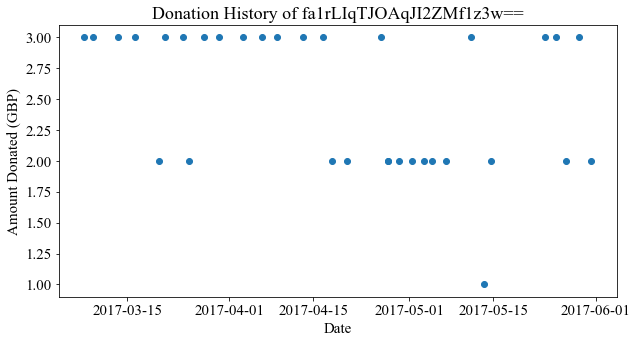

In [35]:
plt.figure(figsize=(10,5))
plt.scatter(donor['ACTIVITY_DATETIME'],donor['ACTIVITY_DATA_4'])
plt.xlabel('Date')
plt.ylabel('Amount Donated (GBP)')
plt.title('Donation History of fa1rLIqTJOAqJI2ZMf1z3w==')

They have given regular donations, though over time the value of them has dropped slightly. Let's see what broadcasting emails they got

In [36]:
all_filtered[all_filtered['SUPPORTER_ID']=='fa1rLIqTJOAqJI2ZMf1z3w==']

,SUPPORTER_ID,COUNTRY,ACTIVITY_TYPE,ACTIVITY_DATETIME,ACTIVITY_ID,ACTIVITY_STATUS,ACTIVITY_DATA_1,ACTIVITY_DATA_2,ACTIVITY_DATA_3,ACTIVITY_DATA_4,...,ACTIVITY_DATA_6,ACTIVITY_DATA_7,ACTIVITY_DATA_8,ACTIVITY_DATA_9,ACTIVITY_DATA_10,ACTIVITY_DATA_26,ACTIVITY_DATA_27,ACTIVITY_DATA_28,ACTIVITY_DATA_29,ACTIVITY_DATA_30
1401696,fa1rLIqTJOAqJI2ZMf1z3w==,AU,EBC,2017-03-26 04:13:05,161032,R,open,NaN,NaN,NaN,...,NaN,NaN,NaN,138058,NaN,NaN,NaN,NaN,NaN,NaN


They got one broadcasting email, but they've been donating before and since

Function to identify sends and transactions of one user?

In [37]:
def get_sends_and_transactions(supporter_id):
    df = all_data[all_data['SUPPORTER_ID'] == supporter_id]
    return(df)

# Task 3: Donations 

The measure I've chosen of if a broadcast email has been effective is if the new donation is made the same day

So above I've added a new column ACTIVITY_DAY which is the day of the activities, not the specific hour. So I can check for EBC and donations in the same day. I'm also going to trim down on the columns I'm using now for clarity

In [38]:
from datetime import datetime
#add new column to broadcasts with day of activity, not hour
all_filtered['ACTIVITY_DATETIME'] =all_filtered['ACTIVITY_DATETIME'].apply(pd.to_datetime)
all_filtered['ACTIVITY_DAY'] = all_filtered['ACTIVITY_DATETIME'].apply(datetime.strftime, format='%Y%m%d')
all_filtered

,SUPPORTER_ID,COUNTRY,ACTIVITY_TYPE,ACTIVITY_DATETIME,ACTIVITY_ID,ACTIVITY_STATUS,ACTIVITY_DATA_1,ACTIVITY_DATA_2,ACTIVITY_DATA_3,ACTIVITY_DATA_4,...,ACTIVITY_DATA_7,ACTIVITY_DATA_8,ACTIVITY_DATA_9,ACTIVITY_DATA_10,ACTIVITY_DATA_26,ACTIVITY_DATA_27,ACTIVITY_DATA_28,ACTIVITY_DATA_29,ACTIVITY_DATA_30,ACTIVITY_DAY
315531,BDoflNnPHog=,CA,EBC,2017-03-07 09:37:06,154395,R,open,click,formsub,NaN,...,NaN,NaN,131397,NaN,NaN,NaN,NaN,NaN,NaN,20170307
315532,BDoflNnPHog=,CA,EBC,2017-03-02 09:25:09,157751,R,open,NaN,NaN,NaN,...,NaN,NaN,134772,NaN,NaN,NaN,NaN,NaN,NaN,20170302
315533,BDoflNnPHog=,CA,EBC,2017-03-10 09:31:02,158310,R,open,NaN,NaN,NaN,...,NaN,NaN,135340,NaN,NaN,NaN,NaN,NaN,NaN,20170310
315534,BDoflNnPHog=,CA,EBC,2017-03-13 13:16:19,158828,R,open,NaN,NaN,NaN,...,NaN,NaN,135857,NaN,NaN,NaN,NaN,NaN,NaN,20170313
315535,5Aia2InAifo=,GBR,EBC,2017-03-06 15:58:08,154395,R,open,NaN,NaN,NaN,...,NaN,NaN,131397,NaN,NaN,NaN,NaN,NaN,NaN,20170306
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1624913,tla3Sns4vbcqJI2ZMf1z3w==,GBR,EBC,2017-05-25 06:49:02,162035,R,open,NaN,NaN,NaN,...,NaN,NaN,139068,NaN,NaN,NaN,NaN,NaN,NaN,20170525
1624999,mGEpfjwwn8i9awglrPTZ7Q==,AU,EBC,2017-05-11 02:19:01,162032,R,open,NaN,NaN,NaN,...,NaN,NaN,139065,NaN,NaN,NaN,NaN,NaN,NaN,20170511
1625094,TvmtSs5QMfS15xl1A%2FXc2A==,GB,EBC,2017-05-29 09:25:05,162035,R,open,NaN,NaN,NaN,...,NaN,NaN,139068,NaN,NaN,NaN,NaN,NaN,NaN,20170529
1626544,BIXAyIgeLKOBKFlzN0740Q==,GB,EBC,2017-05-09 17:25:01,162035,R,open,NaN,NaN,NaN,...,NaN,NaN,139068,NaN,NaN,NaN,NaN,NaN,NaN,20170509


In [39]:
donations['ACTIVITY_DATETIME'] =donations['ACTIVITY_DATETIME'].apply(pd.to_datetime)
donations['ACTIVITY_DAY'] = donations['ACTIVITY_DATETIME'].apply(datetime.strftime, format='%Y%m%d')
donations['ACTIVITY_DAY'] = donations['ACTIVITY_DAY'].astype('int64')

/Users/eleonoraparrag/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/Users/eleonoraparrag/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/Users/eleonoraparrag/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_index

In [40]:
#limit columns to only what we are interested in
donations_sub = donations[['ACTIVITY_DAY','ACTIVITY_DATA_4','ACTIVITY_TYPE','SUPPORTER_ID']]
all_filtered_sub = all_filtered[['ACTIVITY_DAY','ACTIVITY_ID','SUPPORTER_ID']]
all_filtered_sub['ONES'] = np.ones(len(all_filtered_sub))

/Users/eleonoraparrag/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


I'm now joining the broadcasts only table (all_filtered) and the donations table, on the activity day. I've added a column of all ones to all_filtered, to get a count as well when I sum it all up

In [41]:
donations_sub['ACTIVITY_DAY'] = donations_sub['ACTIVITY_DAY'].astype('int64')
all_filtered_sub['ACTIVITY_DAY'] = all_filtered_sub['ACTIVITY_DAY'].astype('int64')

joined_table = all_filtered_sub.merge(donations_sub,on=('ACTIVITY_DAY','SUPPORTER_ID'),how='inner')

/Users/eleonoraparrag/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/Users/eleonoraparrag/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [42]:
joined_table

,ACTIVITY_DAY,ACTIVITY_ID,SUPPORTER_ID,ONES,ACTIVITY_DATA_4,ACTIVITY_TYPE
0,20170328,161768,MpbERpuNCk0=,1.0,35.0,FCS
1,20170324,160150,GJbnFkIn6SY=,1.0,20.0,FCS
2,20170309,158310,4CmZuezC6hw=,1.0,55.0,FCS
3,20170328,161768,ga9c44p8S04=,1.0,50.0,FCS
4,20170328,161768,twfmRyzZ71Q=,1.0,250.0,FCS
...,...,...,...,...,...,...
6683,20170524,162037,udhvUWri76hkwMmtusGc0w==,1.0,10.0,FCS
6684,20170524,162037,udhvUWri76hkwMmtusGc0w==,1.0,10.0,FCS
6685,20170528,158309,vG%2BRV9J3O3CBKFlzN0740Q==,1.0,35.0,FCS
6686,20170517,159079,1R74J0v7QdcqJI2ZMf1z3w==,1.0,35.0,FCS


In [43]:
pd.unique(joined_table['ACTIVITY_TYPE'])

array(['FCS', 'FUR'], dtype=object)

Now I'm getting the broadcasts which made the most additional donations on the same day they were sent:

In [44]:
top_broadcasts = joined_table.groupby('ACTIVITY_ID').sum().reset_index()[['ACTIVITY_ID','ACTIVITY_DATA_4']]
top_broadcasts = top_broadcasts.rename(columns={"ACTIVITY_DATA_4": "SUM_OF_NEW_DONATIONS"})
top_broadcasts = top_broadcasts.sort_values('SUM_OF_NEW_DONATIONS',ascending=False).reset_index()
top_broadcasts['ACTIVITY_ID'] = top_broadcasts['ACTIVITY_ID'].astype(str)
#looking at total sum of donations

In [45]:
most_broadcasts = joined_table.groupby('ACTIVITY_ID').sum().reset_index()[['ACTIVITY_ID','ONES']]
most_broadcasts = most_broadcasts.rename(columns={"ONES": "NO_OF_NEW_DONATIONS"})
most_broadcasts = most_broadcasts.sort_values('NO_OF_NEW_DONATIONS',ascending=False).reset_index()
most_broadcasts['ACTIVITY_ID'] = most_broadcasts['ACTIVITY_ID'].astype(str)
#looking at total number of donations

In [46]:
top_broadcasts = top_broadcasts.merge(most_broadcasts,on='ACTIVITY_ID')
top_broadcasts = top_broadcasts.sort_values('NO_OF_NEW_DONATIONS',ascending=False).reset_index()
#join the tables together

In [47]:
values = all_filtered_sub.value_counts('ACTIVITY_ID').reset_index()
values['ACTIVITY_ID'] = values['ACTIVITY_ID'].astype(str)
values = values.rename(columns={0: "EMAILS_SENT"})
#also count the no. emails sent for each broadcast

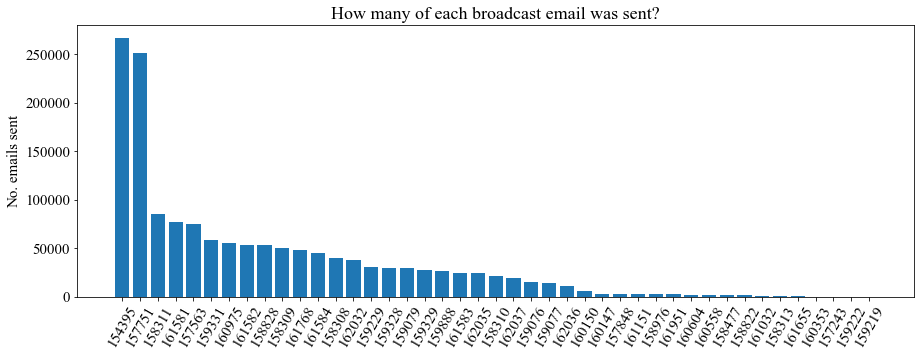

In [48]:
plt.figure(figsize=(15,5))
plt.bar(values['ACTIVITY_ID'],values['EMAILS_SENT'])
plt.xticks(rotation=60)
plt.title("How many of each broadcast email was sent?")
plt.ylabel('No. emails sent')
plt.show()

Broadcast IDs 154395 and 157751 were by far the emails which were sent out the most

In [49]:
top_broadcasts = top_broadcasts.merge(values,on='ACTIVITY_ID')
top_broadcasts = top_broadcasts.sort_values('NO_OF_NEW_DONATIONS',ascending=False).reset_index()
#final table to plot

In [50]:
top_broadcasts['PERCENT_DONATED'] = (top_broadcasts['NO_OF_NEW_DONATIONS']/top_broadcasts['EMAILS_SENT'])*100
top_broadcasts = top_broadcasts.sort_values('PERCENT_DONATED',ascending=False)
#include percent donated rather than just numbers, as theemails were sent to different numbers of people

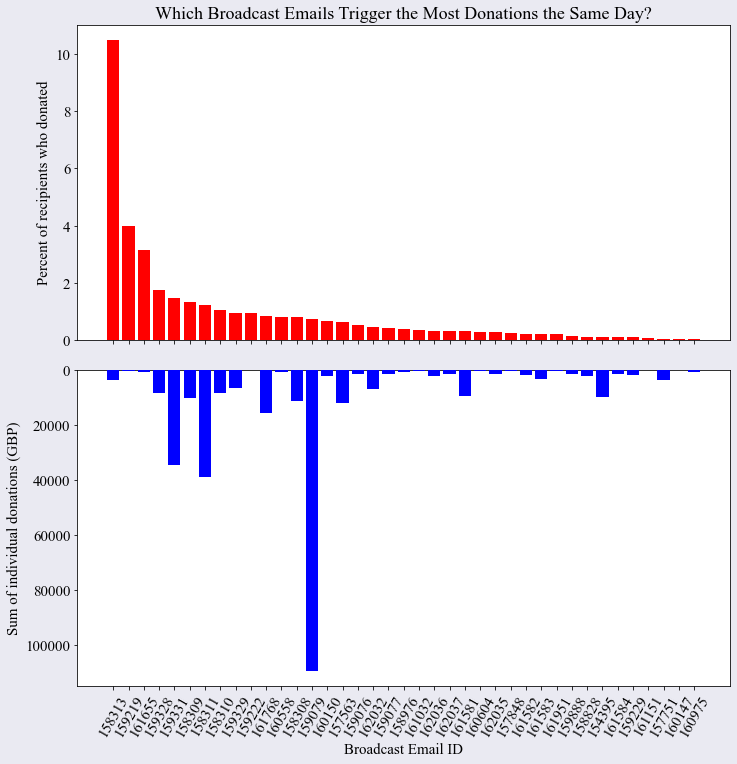

In [51]:
import matplotlib as mpl
from matplotlib.ticker import (MultipleLocator, FormatStrFormatter,
                               AutoMinorLocator)

mpl.rc('font', size=15)
mpl.rc('xtick', labelsize=15)
mpl.rc('ytick', labelsize=15)
mpl.rc('font',family='Times New Roman')

fig, ax = plt.subplots(figsize=(10,10), facecolor='#eaeaf2', nrows=2, sharex=True)
fig.tight_layout()

ax[0].bar(top_broadcasts['ACTIVITY_ID'], top_broadcasts['PERCENT_DONATED'], align='center', color='red', zorder=10)
ax[1].bar(top_broadcasts['ACTIVITY_ID'], top_broadcasts['SUM_OF_NEW_DONATIONS'], align='center', color='blue', zorder=10)
ax[1].invert_yaxis() 
ax[1].set_xlabel('Broadcast Email ID')
ax[0].set_ylabel('Percent of recipients who donated')
ax[1].set_ylabel('Sum of individual donations (GBP)')
ax[0].set_title('Which Broadcast Emails Trigger the Most Donations the Same Day?')
plt.xticks(rotation=60)
plt.show()

The broadcast email which got the highest sum of new donations that day was 159079. The broadcast email which got the most number of people to donate was 158311 (reading from the table), which was no. 2 on total sum of donations. Therefore looks like these were the most successful broadcast emails! However they were also sent to a lot of people. In terms of percent of people who donated (as the more people the email is sent to the more will donate) ID 158313 performed very well, with 10.5% of recipients donating.

Some more summary stats on how many people actually donated:

In [52]:
len(pd.unique(joined_table['SUPPORTER_ID']))#No. supporters who donated the same day they recieved an EBC

5936

In [53]:
len(pd.unique(joined_table[joined_table['ACTIVITY_TYPE']=='FUR']['SUPPORTER_ID']))#No. supporters who donated the same day they recieved an EBC

35

In [54]:
len(pd.unique(joined_table[joined_table['ACTIVITY_TYPE']=='FCS']['SUPPORTER_ID']))#No. supporters who donated the same day they recieved an EBC

5903

In [55]:
len(pd.unique(all_filtered['SUPPORTER_ID']))#No. supporters who were sent an EBC

529937

In [56]:
#what % donated the same day?
(len(pd.unique(joined_table['SUPPORTER_ID']))/len(pd.unique(all_filtered['SUPPORTER_ID'])))*100

1.1201331479024865

In total, 1.12% of recipients donated the same day. Of the 5936 donors, only 35 of them set up a recurring donation, which is a very low number. Maybe a recurring donation needs more consideration than a spur of the moment one off donation in response to an email?

I will just take a quick look at the level of engagement which led to a donation

In [57]:
#same combining of tables as before but now i'm grabbing the engagement columns from all data


donations_sub_2 = donations[['ACTIVITY_DATETIME','ACTIVITY_DAY','ACTIVITY_DATA_4','ACTIVITY_TYPE','SUPPORTER_ID']]
all_filtered_sub_2 = all_filtered[['ACTIVITY_DATETIME','ACTIVITY_DAY','ACTIVITY_ID','SUPPORTER_ID','ACTIVITY_DATA_1','ACTIVITY_DATA_2','ACTIVITY_DATA_6','ACTIVITY_DATA_7']]

donations_sub_2['ACTIVITY_DAY'] = donations_sub_2['ACTIVITY_DAY'].astype('int64')
all_filtered_sub_2['ACTIVITY_DAY'] = all_filtered_sub_2['ACTIVITY_DAY'].astype('int64')
donations_sub_2['SUPPORTER_ID'] = donations_sub_2['SUPPORTER_ID'].astype('str')
all_filtered_sub_2['SUPPORTER_ID'] = all_filtered_sub_2['SUPPORTER_ID'].astype('str')
#opened, clicked, unsubbed,spam
all_filtered_sub_2['ONES'] = np.ones(len(all_filtered_sub_2))
joined_table_2 = all_filtered_sub_2.merge(donations_sub_2,on=('ACTIVITY_DAY','SUPPORTER_ID'),how='inner')
joined_table_2

/Users/eleonoraparrag/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
/Users/eleonoraparrag/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/Users/eleonoraparrag/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See 

,ACTIVITY_DATETIME_x,ACTIVITY_DAY,ACTIVITY_ID,SUPPORTER_ID,ACTIVITY_DATA_1,ACTIVITY_DATA_2,ACTIVITY_DATA_6,ACTIVITY_DATA_7,ONES,ACTIVITY_DATETIME_y,ACTIVITY_DATA_4,ACTIVITY_TYPE
0,2017-03-28 12:52:01,20170328,161768,MpbERpuNCk0=,open,click,NaN,NaN,1.0,2017-03-28 13:01:09,35.0,FCS
1,2017-03-24 13:28:08,20170324,160150,GJbnFkIn6SY=,open,click,NaN,NaN,1.0,2017-03-24 13:29:51,20.0,FCS
2,2017-03-09 14:52:07,20170309,158310,4CmZuezC6hw=,open,click,NaN,NaN,1.0,2017-03-09 16:06:38,55.0,FCS
3,2017-03-28 14:40:12,20170328,161768,ga9c44p8S04=,open,click,NaN,NaN,1.0,2017-03-28 14:51:58,50.0,FCS
4,2017-03-28 21:19:01,20170328,161768,twfmRyzZ71Q=,open,click,NaN,NaN,1.0,2017-03-28 21:21:05,250.0,FCS
...,...,...,...,...,...,...,...,...,...,...,...,...
6683,2017-05-24 13:10:03,20170524,162037,udhvUWri76hkwMmtusGc0w==,open,click,NaN,NaN,1.0,2017-05-24 13:01:51,10.0,FCS
6684,2017-05-24 13:10:03,20170524,162037,udhvUWri76hkwMmtusGc0w==,open,click,NaN,NaN,1.0,2017-05-24 16:19:15,10.0,FCS
6685,2017-05-28 05:28:02,20170528,158309,vG%2BRV9J3O3CBKFlzN0740Q==,open,NaN,NaN,NaN,1.0,2017-05-28 05:24:15,35.0,FCS
6686,2017-05-17 20:58:02,20170517,159079,1R74J0v7QdcqJI2ZMf1z3w==,open,click,NaN,NaN,1.0,2017-05-17 21:06:26,35.0,FCS


In [58]:
print(str((joined_table_2.value_counts('ACTIVITY_DATA_2')[0]/len(joined_table_2))*100)+' of supporters clicked on the email')

91.08851674641149 of supporters clicked on the email


As could be expected, this is a very high level of engagement with the emails. If they're donating, they probably will click on the email

In [59]:
print(str((joined_table_2.value_counts('ACTIVITY_DATA_1')[0]/len(joined_table_2))*100)+' of supporters opened the email')

97.48803827751196 of supporters opened the email


In [60]:
print(str((joined_table_2.value_counts('ACTIVITY_DATA_6')[0]/len(joined_table_2))*100)+' of supporters unsubbed after the email')

0.14952153110047847 of supporters unsubbed after the email


Maybe some of them donated a one off and decided it was enough?

In [61]:
joined_table_2[joined_table_2['ACTIVITY_DATA_6']=='unsub']

,ACTIVITY_DATETIME_x,ACTIVITY_DAY,ACTIVITY_ID,SUPPORTER_ID,ACTIVITY_DATA_1,ACTIVITY_DATA_2,ACTIVITY_DATA_6,ACTIVITY_DATA_7,ONES,ACTIVITY_DATETIME_y,ACTIVITY_DATA_4,ACTIVITY_TYPE
702,2017-03-09 16:46:06,20170309,158309,GgMT0EsbQ3WZkArzVWMSmA==,open,click,unsub,NaN,1.0,2017-03-09 16:47:00,25.0,FCS
1045,2017-03-22 14:10:16,20170322,160150,8iVZ92P%2F21yZkArzVWMSmA==,open,NaN,unsub,NaN,1.0,2017-03-22 08:47:11,35.0,FCS
1907,2017-03-10 10:37:00,20170310,158309,CKw67Cb1%2FcmZkArzVWMSmA==,open,click,unsub,NaN,1.0,2017-03-10 10:36:55,15.0,FCS
2633,2017-03-10 05:40:02,20170310,158308,27K9umK%2Fol2ZkArzVWMSmA==,open,click,unsub,NaN,1.0,2017-03-10 05:43:56,40.0,FCS
2670,2017-03-09 17:07:04,20170309,158309,YVo0gDInwKOZkArzVWMSmA==,open,click,unsub,NaN,1.0,2017-03-09 17:06:29,5.0,FCS
3345,2017-03-09 19:40:01,20170309,158311,YC5Jmam9V%2FKZkArzVWMSmA==,open,click,unsub,NaN,1.0,2017-03-09 19:49:09,20.0,FCS
4310,2017-03-15 06:10:02,20170315,159329,cq4gBuvoEBKZkArzVWMSmA==,open,click,unsub,NaN,1.0,2017-03-15 06:12:29,15.0,FCS
5319,2017-03-10 08:19:05,20170310,158308,9zTjSCcXfN615xl1A%2FXc2A==,open,click,unsub,NaN,1.0,2017-03-10 08:27:36,25.0,FCS
6047,2017-03-22 14:22:16,20170322,159079,Lep%2BpXE9xCy%2FgO2vkuoghg==,open,NaN,unsub,NaN,1.0,2017-03-22 14:31:04,10.0,FCS
6294,2017-03-25 16:46:00,20170325,159331,1SVtGxnBvJuq8wJuoPi1Lg==,open,click,unsub,NaN,1.0,2017-03-25 16:48:19,15.0,FCS


As could be expected, these are all FCS one-off donors (as are most of these donations)

In [62]:
joined_table_2.value_counts('ACTIVITY_DATA_7')

Series([], dtype: int64)

None of them reported it as spam

Comparing to the average engagement levels:

In [63]:
total,opened, clicked, unsub,spam = get_stats(pd.concat((march_filtered,april_filtered,may_filtered)))
print('Total',total)
print('Opened:',opened,' ',str(((opened/total)*100)),'%')
print('Clicked:',clicked,' ',str(((clicked/total)*100)),'%')
print('Unsubbed:',unsub,' ',str(((unsub/total)*100)),'%')
print('Marked as spam:',spam,' ',str(((spam/total)*100)),'%')

Total 1503356
Opened: 1488551   99.0152033184422 %
Clicked: 146361   9.735618176932144 %
Unsubbed: 10406   0.6921846854637226 %
Marked as spam: 1064   0.07077498609777058 %


Text(0.5, 1.0, 'Engagement of Supporers who donated compared to Average')

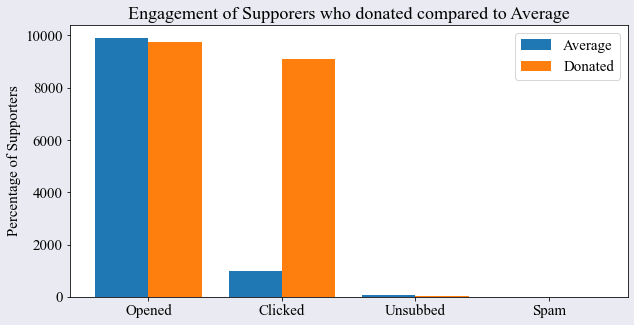

In [64]:
fig,ax = plt.subplots(nrows=1,ncols=1,figsize=(10,5),facecolor='#eaeaf2')

plt.setp(ax, xticks=[1,2,3,4], xticklabels=['Opened','Clicked','Unsubbed','Spam'])
plt.sca(ax)
plt.xticks(range(4), ['Opened','Clicked','Unsubbed','Spam'])

X_axis = np.arange(4) 
  
ax.bar(X_axis - 0.2, np.array([99.015,9.736,0.692,0.071])*100, 0.4, label = 'Average') 
ax.bar(X_axis+0.2, np.array([97.48,91.09,0.1495,0])*100, 0.4, label = 'Donated') 
 
ax.set_ylabel("Percentage of Supporters") 
ax.legend()
ax.set_title('Engagement of Supporers who donated compared to Average')

Interestingly the 'opened' engagement level is lower for the donators - some of them saw the email arrive in their inbox and that was enough? 

Finally - what about the average time between email and donation?

In [65]:
joined_table_2['DELAY'] = joined_table_2['ACTIVITY_DATETIME_y']-joined_table_2['ACTIVITY_DATETIME_x']
joined_table_2['DELAY']

0        0 days 00:09:08
1        0 days 00:01:43
2        0 days 01:14:31
3        0 days 00:11:46
4        0 days 00:02:04
              ...       
6683   -1 days +23:51:48
6684     0 days 03:09:12
6685   -1 days +23:56:13
6686     0 days 00:08:24
6687     0 days 00:08:23
Name: DELAY, Length: 6688, dtype: timedelta64[ns]

Hmm, a couple of these are negative - coincidental donation same day? 

In [66]:
joined_table_2[joined_table_2['DELAY']<'0 days']

,ACTIVITY_DATETIME_x,ACTIVITY_DAY,ACTIVITY_ID,SUPPORTER_ID,ACTIVITY_DATA_1,ACTIVITY_DATA_2,ACTIVITY_DATA_6,ACTIVITY_DATA_7,ONES,ACTIVITY_DATETIME_y,ACTIVITY_DATA_4,ACTIVITY_TYPE,DELAY
5,2017-03-09 15:16:11,20170309,158310,iycV34Dms7Y=,open,click,NaN,NaN,1.0,2017-03-09 15:14:55,55.0,FCS,-1 days +23:58:44
14,2017-03-09 19:31:03,20170309,158310,qlrlDgcuJBc=,open,click,NaN,NaN,1.0,2017-03-09 19:30:26,55.0,FCS,-1 days +23:59:23
15,2017-03-09 17:40:14,20170309,157751,aNtTdU2T%2BH8=,open,NaN,NaN,NaN,1.0,2017-03-09 16:43:56,55.0,FCS,-1 days +23:03:42
18,2017-03-10 05:34:03,20170310,158308,gvVy8WKIkSc=,open,click,NaN,NaN,1.0,2017-03-10 05:33:16,40.0,FCS,-1 days +23:59:13
20,2017-03-03 11:13:15,20170303,157563,BfiUzjGiE7c=,open,click,NaN,NaN,1.0,2017-03-03 11:11:31,25.0,FCS,-1 days +23:58:16
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6676,2017-05-21 21:07:00,20170521,161583,ZIoOGi2lTXazFWMrHGgntg==,open,click,NaN,NaN,1.0,2017-05-21 21:06:18,20.0,FCS,-1 days +23:59:18
6677,2017-05-31 14:31:03,20170531,158310,7BQKn4twU1UqJI2ZMf1z3w==,open,NaN,NaN,NaN,1.0,2017-05-31 13:13:17,35.0,FCS,-1 days +22:42:14
6681,2017-05-24 13:04:01,20170524,161584,udhvUWri76hkwMmtusGc0w==,open,click,NaN,NaN,1.0,2017-05-24 13:01:51,10.0,FCS,-1 days +23:57:50
6683,2017-05-24 13:10:03,20170524,162037,udhvUWri76hkwMmtusGc0w==,open,click,NaN,NaN,1.0,2017-05-24 13:01:51,10.0,FCS,-1 days +23:51:48


These are still very close together, so unless these are some very weird coincidences, perhaps the datetimes aren't 100% accurate sometimes

In [67]:
np.mean(joined_table_2[joined_table_2['DELAY']>'0 days']['DELAY'])#mean of time delays where they are greater than 0

Timedelta('0 days 00:45:06.120041109')

In [68]:
np.std(joined_table_2[joined_table_2['DELAY']>'0 days']['DELAY'])#standard deviation

Timedelta('0 days 02:12:36.200231706')

(Removing these negative times as they have the large 23hrs values, finding the mean time between delay)

Mean time between email reciept and donation is 45 minutes, with a standard deviation of 2hr12 mins

In [69]:
np.min(joined_table_2[joined_table_2['DELAY']>'0 days']['DELAY'])

Timedelta('0 days 00:00:01')

Again I think there could be some errors with the timings ^^

In [70]:
np.max(joined_table_2[joined_table_2['DELAY']>'0 days']['DELAY'])

Timedelta('0 days 22:25:14')

How many of the FCS donors become FUR after these broadcast emails?

In [71]:
recurring_supporters = list(pd.unique(joined_table_2[joined_table_2['ACTIVITY_TYPE']=='FUR']['SUPPORTER_ID']))
recurring_supporters#people who set up a FUR the same day as a donation email

['PyWEuxk%2BAUeZkArzVWMSmA==',
 'tDojzTLMi2CZkArzVWMSmA==',
 'Ln5h1SnW49yZkArzVWMSmA==',
 'QSkkDZAsdISZkArzVWMSmA==',
 '%2FJ9Yb8Or%2BLeZkArzVWMSmA==',
 'tlEDikmmAe%2BZkArzVWMSmA==',
 'ubUKmv1jd9aZkArzVWMSmA==',
 '8iEM20GR4WSZkArzVWMSmA==',
 'teEcg6fohtCZkArzVWMSmA==',
 'KkzXm3%2FAI%2BCZkArzVWMSmA==',
 'c%2FXEIOqTPHOZkArzVWMSmA==',
 'kGH9cswxSAmZkArzVWMSmA==',
 'D6Mp1QAM9fSZkArzVWMSmA==',
 'HhgHmcGNNjqZkArzVWMSmA==',
 'JL0Yb2OhsySZkArzVWMSmA==',
 'rBf8JW15WpiZkArzVWMSmA==',
 'HzJ6ab7oZ0eZkArzVWMSmA==',
 '9KBALrBzmiCZkArzVWMSmA==',
 'pZC8JLUjTbGZkArzVWMSmA==',
 'RZgfiMmcZQeZkArzVWMSmA==',
 'AvCz%2FolKnhKZkArzVWMSmA==',
 'F7HYqmmRPGaZkArzVWMSmA==',
 '%2Fac9UKN7wRSZkArzVWMSmA==',
 'ebVI39Nsp5GZkArzVWMSmA==',
 'znxrib%2BLzRSBKFlzN0740Q==',
 'sYywsBcB6gEqJI2ZMf1z3w==',
 '%2FG8O%2B2s2XwNkwMmtusGc0w==',
 'xW4XUujQsJyzFWMrHGgntg==',
 'DbjkXU1nEpFkwMmtusGc0w==',
 'fDPnbAA8MpoqJI2ZMf1z3w==',
 'bNnUz7uvA5oqJI2ZMf1z3w==',
 'efIBb4muh1G%2FgO2vkuoghg==',
 'fHSQh8wuM2uha0eWUOvjsw==',
 '4K5WPUp5QWWzFWM

In [72]:
for i in recurring_supporters:
    specific_supporter = (donations[donations['SUPPORTER_ID']==i])
    if 'FCS' in list(specific_supporter['ACTIVITY_TYPE']):
        print('Also donated FCS, supporter ',i)

Also donated FCS, supporter  kGH9cswxSAmZkArzVWMSmA==
Also donated FCS, supporter  sYywsBcB6gEqJI2ZMf1z3w==
Also donated FCS, supporter  xW4XUujQsJyzFWMrHGgntg==


After looking at them manually, looks like none of these meet the criteria of becoming FUR after broadcast email and strictly FCS before. 

Something for further investigation: what if the delay between donation and EBC is more than a day? Where would we draw the line between the email triggering the donation? I think for now assuming same day was a reasonable assumption 

Thank you for reading through my notebook! I hope you found it interesting